In [134]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from itertools import product
%matplotlib inline

First, we generate $70$ points in the $500 x 500$ matrix

In [21]:
def generate_map():
    data = np.zeros((500, 500))
    points = []
    for i in range(70):
        num = np.random.randint(0, 500*500 - 1)
        i = num // 500
        j = num  % 500
        data[i, j] = 255.
        points.append((i, j))
    return data, points

In [41]:
def get_points_in_circle(coords, radius):
    result = []
    for x in range(coords[0] - radius, coords[0] + 1):
        for y in range(coords[1] - radius, coords[1] + 1):
            if (x - coords[0])**2 + (y - coords[1])**2 <= radius**2:
                x_s = coords[0] - (x - coords[0])
                y_s = coords[1] - (y - coords[1])
                result.append((x, y))
                result.append((x, y_s))
                result.append((x_s, y))
                result.append((x_s, y_s))
    return result

In [55]:
def enlarge_points(data, points, radius=20):
    d = data.copy()
    for point in points:
        for new_point in get_points_in_circle(point, radius):
            try:
                d[new_point] = 255
            except:
                pass
    return d

In [211]:
data, points = generate_map()

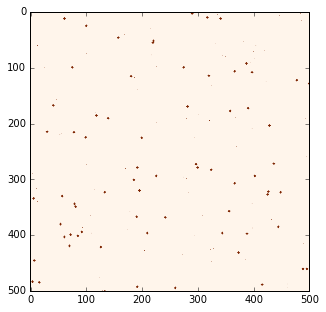

In [251]:
plt.figure(figsize=(5, 5))
plt.imshow(enlarge_points(data.T, points, radius=2), cmap='Oranges');

Now, $Voronoi$

In [247]:
def neighbours(i, j, width=500, height=500):
    neighbors_i = [i - 1, i, i + 1]
    neighbors_j = [j - 1, j, j + 1]
    for i, j in product(neighbors_i, neighbors_j):
        if 0 <= i < width and 0 <= j < height:
            yield (i, j)
            
def check_neighbours(i, j, image):
    color = image[(i, j)]
    for n in neighbours(i, j):
        if image[n] != color:
            return True
    return False

In [230]:
def generate_closest(points, width=500, height=500):
    result = np.tile(-1, (width, height))
    colors = list(range(len(points)))
    minimum = np.hypot(width - 1, height - 1)
    for y in range(height):
        for x in range(width):
            dmin = minimum; j = -1
            for index, point in enumerate(points):
                d = np.hypot(point[0] - x, point[1] - y)
                if d < dmin:
                    dmin = d; j = index
            result[x, y] = colors[j]
    return result.T

In [231]:
closest = generate_closest(points)

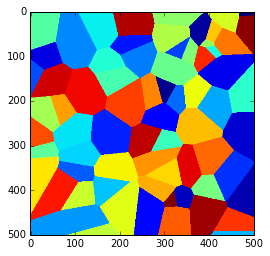

In [232]:
plt.imshow(closest)

In [248]:
def generate_lines(image, width=500, height=500):
    img = np.tile(255, (width, height))
    for y in range(height):
        for x in range(width):
            if not check_neighbours(x, y, image):
                img[x, y] = 0
    return img.T

In [249]:
lines = generate_lines(closest)

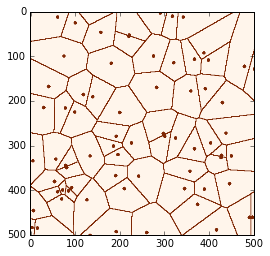

In [250]:
plt.imshow(enlarge_points(lines, points, radius=4), cmap='Oranges')